In [76]:
import csv
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import neurokit2 as nk
import pandas as pd

(9000, 1)
(9000,)


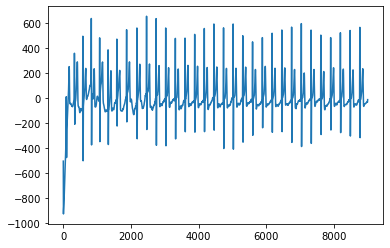

In [45]:
data = sio.loadmat('training/'+'train_ecg_00002'+'.mat')
signal = data['val'].T
print(signal.shape)
signal = np.ravel(signal)
print(signal.shape)
plt.plot(signal) 
plt.show()

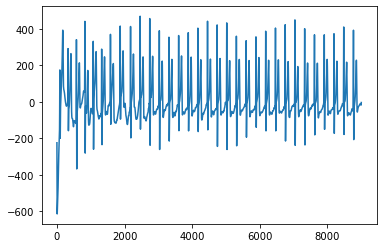

In [46]:
#clean the signal with neurokit ecg_clean
fs = 300
signal_cleaned = nk.ecg_clean(signal, sampling_rate=fs)
plt.plot(signal_cleaned) 
plt.show()

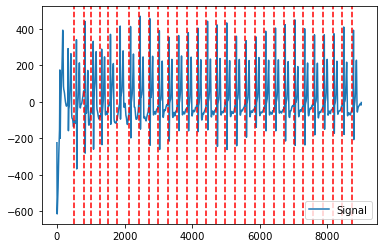

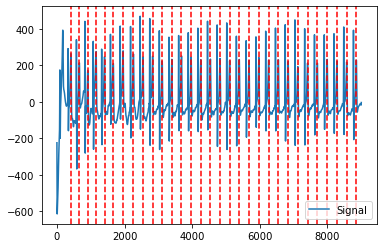

In [47]:
#detect peaks
_, rpeaks = nk.ecg_peaks(signal_cleaned, sampling_rate=fs)
signals, waves = nk.ecg_delineate(signal_cleaned, rpeaks, sampling_rate=fs)
nk.events_plot(waves["ECG_P_Peaks"], signal_cleaned);
nk.events_plot(waves["ECG_T_Peaks"], signal_cleaned);

C:\Users\timen\Anaconda3\envs\KIMed\lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:486: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `windows` argument in `nk.fractal_dfa()` for more information.
  warn(
C:\Users\timen\Anaconda3\envs\KIMed\lib\site-packages\neurokit2\complexity\entropy_multiscale.py:202: RuntimeWarning: invalid value encountered in double_scalars
  mse = np.trapz(mse) / len(mse)
C:\Users\timen\Anaconda3\envs\KIMed\lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:486: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `windows` argument in `nk.fractal_dfa()` for more information.
  warn(
C:\Users\timen\Anaconda3\envs\KIMed\lib\site-packages\neurokit2\complexit

(1, 72)
(1, 73)


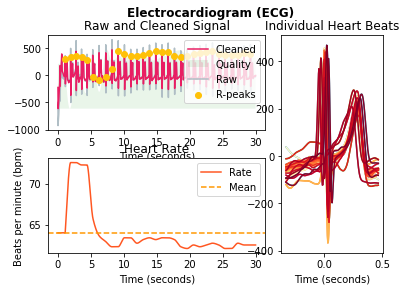

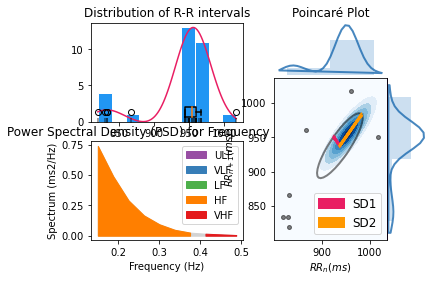

In [72]:
#using the processing of neurokit#
signals, info = nk.ecg_process(signal, sampling_rate=fs, method='neurokit')
nk.ecg_plot(signals, sampling_rate=fs, show_type='default') 
analyzed = nk.ecg_analyze(signals, sampling_rate=fs)
peaks, info = nk.ecg_peaks(signal, sampling_rate=fs)
hrv_indices = nk.hrv(peaks,sampling_rate=fs, show=True)
print(hrv_indices.shape)
print(analyzed.shape)

{'ECG_P_Peaks': [307,
  nan,
  1173,
  1341,
  nan,
  1669,
  nan,
  1984,
  nan,
  nan,
  2796,
  2920,
  3048,
  3219,
  3377,
  nan,
  3693,
  3847,
  4029,
  4206,
  4393,
  nan,
  4717,
  4879,
  nan,
  5225,
  nan,
  5538,
  nan,
  5841,
  nan,
  6140,
  6454,
  6641,
  6813,
  nan,
  7180,
  nan,
  7536,
  7714,
  7865,
  8060,
  8239,
  8391,
  nan,
  8711,
  9029,
  9210,
  9372,
  9510,
  9704,
  9886,
  10072,
  10251,
  nan,
  nan,
  nan,
  nan,
  11157,
  11329,
  11468,
  11799,
  11964,
  12145,
  12304,
  12432,
  12787,
  nan,
  13109,
  13306,
  13466,
  nan,
  13847,
  14008,
  14174,
  14343,
  14499,
  14671,
  14814,
  14988,
  15117,
  15301,
  15455,
  15595,
  nan,
  15936,
  nan,
  16333,
  16500,
  16684,
  16858,
  17038,
  17197,
  17354,
  17531,
  17678,
  17839],
 'ECG_P_Onsets': [300,
  nan,
  1166,
  1326,
  nan,
  1667,
  nan,
  1982,
  nan,
  nan,
  2789,
  2875,
  3044,
  3216,
  3375,
  nan,
  3674,
  3835,
  4023,
  4184,
  4375,
  nan,
  4687,
  

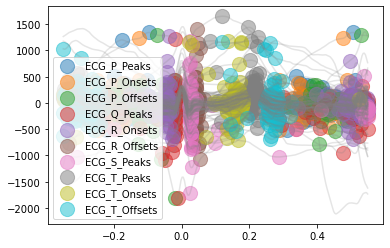

In [310]:
_, rpeaks = nk.ecg_peaks(signal, sampling_rate=fs)
signal_dwt, waves_dwt = nk.ecg_delineate(signal, rpeaks, sampling_rate=fs, method="dwt", show=True, show_type='all')
waves_dwt

In [106]:
#using all features of ecg_analyze
dataFrame = pd.DataFrame();

signals, info = nk.ecg_process(signal, sampling_rate=fs, method='neurokit')
analyzed = nk.ecg_analyze(signals, sampling_rate=fs)
analyzed['TYPE'] = "A"

dataFrame.append(analyzed)
frames = [analyzed, analyzed]
result = pd.concat(frames)
result

test


C:\Users\timen\Anaconda3\envs\KIMed\lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:486: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `windows` argument in `nk.fractal_dfa()` for more information.
  warn(
C:\Users\timen\Anaconda3\envs\KIMed\lib\site-packages\neurokit2\complexity\entropy_multiscale.py:202: RuntimeWarning: invalid value encountered in double_scalars
  mse = np.trapz(mse) / len(mse)
C:\Users\timen\AppData\Local\Temp\ipykernel_15980\1073110332.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataFrame.append(analyzed)


,ECG_Rate_Mean,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,...,HRV_ShanEn,HRV_FuzzyEn,HRV_MSE,HRV_CMSE,HRV_RCMSE,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC,TYPE
0,64.01005,937.666667,44.833878,NaN,NaN,NaN,NaN,NaN,NaN,17.573055,...,3.257426,0.465767,NaN,NaN,NaN,0.593065,1.142019,1.190573,0.981378,A
0,64.01005,937.666667,44.833878,NaN,NaN,NaN,NaN,NaN,NaN,17.573055,...,3.257426,0.465767,NaN,NaN,NaN,0.593065,1.142019,1.190573,0.981378,A


In [220]:
fs = 300 
analyzed_list = []
with open('training/REFERENCE.csv') as csv_file:      # Einlesen der Liste mit Dateinamen und Zuordnung
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        data = sio.loadmat('training/'+row[0]+'.mat')   # Import der EKG-Dateien
        signal = data['val'][0]
        try:
            signals, info = nk.ecg_process(signal, sampling_rate=fs, method='neurokit')
            analyzed = nk.ecg_analyze(signals, sampling_rate=fs)
            analyzed['TYPE'] = ''
            if row[1]=='N':
                analyzed['TYPE'] = 'N'        # Zuordnung zu "Normal"
            if row[1]=='A':
                analyzed['TYPE'] = 'A'             # Zuordnung zu "Vorhofflimmern"

            if analyzed['TYPE'].values[0]:
                analyzed_list.append(analyzed)
        except:
            print(line_count)
        line_count = line_count + 1
df = pd.concat(analyzed_list, axis=0)



C:\Users\timen\Anaconda3\envs\KIMed\lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:486: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `windows` argument in `nk.fractal_dfa()` for more information.
  warn(
C:\Users\timen\Anaconda3\envs\KIMed\lib\site-packages\neurokit2\complexity\entropy_multiscale.py:202: RuntimeWarning: invalid value encountered in double_scalars
  mse = np.trapz(mse) / len(mse)
C:\Users\timen\Anaconda3\envs\KIMed\lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:486: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `windows` argument in `nk.fractal_dfa()` for more information.
  warn(
C:\Users\timen\Anaconda3\envs\KIMed\lib\site-packages\neurokit2\complexit

In [221]:
len(dftest)

5

In [155]:
df_totest 

In [222]:
df_totest

,ECG_Rate_Mean,HRV_MeanNN,HRV_SDNN,HRV_RMSSD,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,...,HRV_DFA_alpha1_DimMean,HRV_ApEn,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC,TYPE
0,58.230248,1039.404762,231.216240,212.201861,216.244018,0.222451,0.204157,1155.000000,44.478,0.038509,...,0.574609,0.243073,0.364643,4.521641,0.607871,0.414794,1.563704,1.740771,1.030147,0
0,64.010050,937.666667,44.833878,17.573055,17.261155,0.047814,0.018741,955.000000,12.355,0.012937,...,0.217873,0.460527,0.441833,3.257426,0.465767,0.593065,1.142019,1.190573,0.981378,0
0,59.203044,1013.809524,28.713345,24.300925,24.671312,0.028322,0.023970,1010.000000,19.768,0.019572,...,0.262068,0.165662,1.386294,3.994680,1.266625,1.087416,1.566360,2.200270,1.030147,0
0,78.868110,762.702703,133.993361,110.178027,111.739927,0.175682,0.144457,803.333333,24.710,0.030759,...,0.545473,0.442588,0.408171,4.357838,0.637263,0.451589,1.186513,1.590961,1.126368,0
0,64.857270,926.000000,65.139655,61.211318,63.440723,0.070345,0.066103,913.333333,64.246,0.070342,...,0.681256,0.024913,-inf,3.640224,1.595844,0.793048,1.725645,2.098956,1.562756,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,75.666991,794.144144,68.418670,36.094013,36.212556,0.086154,0.045450,810.000000,69.188,0.085417,...,0.377413,0.428543,1.139434,4.520000,0.916198,1.149054,1.140963,1.758929,0.844776,0
0,81.047122,740.341880,12.158670,7.453560,7.520059,0.016423,0.010068,743.333333,14.826,0.019945,...,0.627656,0.119257,inf,3.513110,1.171125,1.255665,1.247093,1.970708,0.948662,0
0,74.660837,801.555556,42.926047,22.289580,19.859088,0.053553,0.027808,790.000000,24.710,0.031278,...,0.531643,0.202406,inf,3.640224,0.951734,0.901280,1.547238,1.254580,1.302297,0
0,164.914070,364.166667,30.144985,34.829300,35.050594,0.082778,0.095641,361.666667,27.181,0.075155,...,0.189830,0.518301,2.240710,4.535555,1.422458,1.334796,1.968508,3.161493,1.185362,1


In [223]:
df_totest = df_totest.dropna(axis=1)
df_totest

,ECG_Rate_Mean,HRV_MeanNN,HRV_SDNN,HRV_RMSSD,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,...,HRV_DFA_alpha1_DimMean,HRV_ApEn,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC,TYPE
0,58.230248,1039.404762,231.216240,212.201861,216.244018,0.222451,0.204157,1155.000000,44.478,0.038509,...,0.574609,0.243073,0.364643,4.521641,0.607871,0.414794,1.563704,1.740771,1.030147,0
0,64.010050,937.666667,44.833878,17.573055,17.261155,0.047814,0.018741,955.000000,12.355,0.012937,...,0.217873,0.460527,0.441833,3.257426,0.465767,0.593065,1.142019,1.190573,0.981378,0
0,59.203044,1013.809524,28.713345,24.300925,24.671312,0.028322,0.023970,1010.000000,19.768,0.019572,...,0.262068,0.165662,1.386294,3.994680,1.266625,1.087416,1.566360,2.200270,1.030147,0
0,78.868110,762.702703,133.993361,110.178027,111.739927,0.175682,0.144457,803.333333,24.710,0.030759,...,0.545473,0.442588,0.408171,4.357838,0.637263,0.451589,1.186513,1.590961,1.126368,0
0,64.857270,926.000000,65.139655,61.211318,63.440723,0.070345,0.066103,913.333333,64.246,0.070342,...,0.681256,0.024913,-inf,3.640224,1.595844,0.793048,1.725645,2.098956,1.562756,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,75.666991,794.144144,68.418670,36.094013,36.212556,0.086154,0.045450,810.000000,69.188,0.085417,...,0.377413,0.428543,1.139434,4.520000,0.916198,1.149054,1.140963,1.758929,0.844776,0
0,81.047122,740.341880,12.158670,7.453560,7.520059,0.016423,0.010068,743.333333,14.826,0.019945,...,0.627656,0.119257,inf,3.513110,1.171125,1.255665,1.247093,1.970708,0.948662,0
0,74.660837,801.555556,42.926047,22.289580,19.859088,0.053553,0.027808,790.000000,24.710,0.031278,...,0.531643,0.202406,inf,3.640224,0.951734,0.901280,1.547238,1.254580,1.302297,0
0,164.914070,364.166667,30.144985,34.829300,35.050594,0.082778,0.095641,361.666667,27.181,0.075155,...,0.189830,0.518301,2.240710,4.535555,1.422458,1.334796,1.968508,3.161493,1.185362,1


In [224]:
df_totest = df_totest.replace('N', 0)
df_totest = df_totest.replace('A', 1)

In [278]:
correlation = df_totest.corr()
correlation = correlation['TYPE']
correlation

ECG_Rate_Mean              0.457491
HRV_MeanNN                -0.347755
HRV_SDNN                   0.274709
HRV_RMSSD                  0.335730
HRV_SDSD                   0.333469
HRV_CVNN                   0.446846
HRV_CVSD                   0.511722
HRV_MedianNN              -0.394098
HRV_MadNN                  0.413784
HRV_MCVNN                  0.576699
HRV_IQRNN                  0.345607
HRV_pNN50                  0.625069
HRV_pNN20                  0.503470
HRV_HTI                    0.475110
HRV_TINN                   0.086907
HRV_SD1                    0.333469
HRV_SD2                    0.241726
HRV_SD1SD2                 0.369422
HRV_S                      0.093986
HRV_CSI                   -0.296757
HRV_CVI                    0.416965
HRV_CSI_Modified           0.031498
HRV_PIP                    0.258666
HRV_IALS                   0.268096
HRV_PSS                    0.211083
HRV_PAS                    0.179935
HRV_GI                     0.005993
HRV_SI                    -0

In [303]:
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [269]:
features = list(df_totest.columns[:-1])
features.remove('HRV_SampEn')
print(features)
print(len(features))

['ECG_Rate_Mean', 'HRV_MeanNN', 'HRV_SDNN', 'HRV_RMSSD', 'HRV_SDSD', 'HRV_CVNN', 'HRV_CVSD', 'HRV_MedianNN', 'HRV_MadNN', 'HRV_MCVNN', 'HRV_IQRNN', 'HRV_pNN50', 'HRV_pNN20', 'HRV_HTI', 'HRV_TINN', 'HRV_SD1', 'HRV_SD2', 'HRV_SD1SD2', 'HRV_S', 'HRV_CSI', 'HRV_CVI', 'HRV_CSI_Modified', 'HRV_PIP', 'HRV_IALS', 'HRV_PSS', 'HRV_PAS', 'HRV_GI', 'HRV_SI', 'HRV_AI', 'HRV_PI', 'HRV_C1d', 'HRV_C1a', 'HRV_SD1d', 'HRV_SD1a', 'HRV_C2d', 'HRV_C2a', 'HRV_SD2d', 'HRV_SD2a', 'HRV_Cd', 'HRV_Ca', 'HRV_SDNNd', 'HRV_SDNNa', 'HRV_DFA_alpha1', 'HRV_DFA_alpha1_ExpRange', 'HRV_DFA_alpha1_ExpMean', 'HRV_DFA_alpha1_DimRange', 'HRV_DFA_alpha1_DimMean', 'HRV_ApEn', 'HRV_ShanEn', 'HRV_FuzzyEn', 'HRV_CD', 'HRV_HFD', 'HRV_KFD', 'HRV_LZC']
54


[[695  30]
 [ 16  73]]
0.7604166666666665


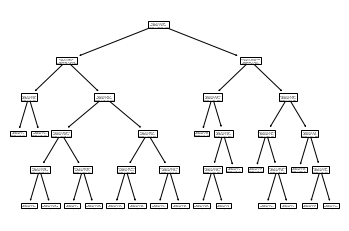

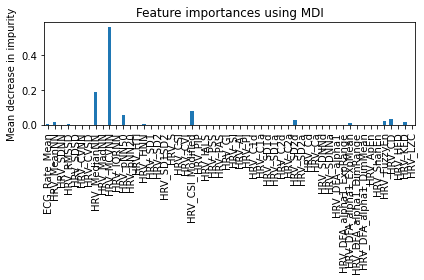

In [308]:
y_comp = df_totest['TYPE']
X_comp = df_totest[features]
X_train, X_test, y_train, y_test = train_test_split(X_comp, y_comp, test_size=0.2, random_state=99)

dt = tree.DecisionTreeClassifier(min_samples_split=20, random_state=99, max_depth=5)#, max_features=10, class_weight='balanced')
dt.fit(X_train, y_train)

predicted = dt.predict(X_test)
print(confusion_matrix(predicted, y_test))
print(f1_score(predicted, y_test))

tree.plot_tree(dt)
plt.show()

tree_importances = pd.Series(dt.feature_importances_, index=features)

fig, ax = plt.subplots()
tree_importances.plot.bar( ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

[[706  24]
 [  5  79]]
0.8449197860962567


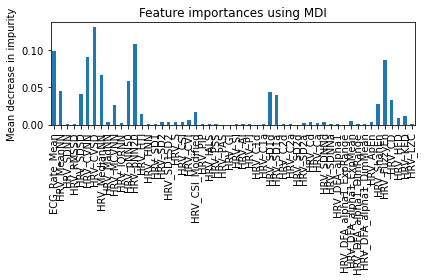

In [296]:
dt = RandomForestClassifier(n_estimators=10, min_samples_split=20, random_state=99, max_depth=5, max_features=10)
dt.fit(X_train, y_train)

predicted = dt.predict(X_test)
print(confusion_matrix(predicted, y_test))
print(f1_score(predicted, y_test))

tree_importances = pd.Series(dt.feature_importances_, index=features)

fig, ax = plt.subplots()
tree_importances.plot.bar( ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
svm = svm.SVC()


In [297]:
import pickle

In [299]:
filname = 'modelTim.sav'
pickle.dump(dt,open(filname,'wb'))

In [300]:
load_model = pickle.load(open(filname, 'rb'))

In [302]:
predicted = load_model.predict(X_test)
print(confusion_matrix(predicted, y_test))
print(f1_score(predicted, y_test))

[[706  24]
 [  5  79]]
0.8449197860962567
